In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# Windows: 'Malgun Gothic', macOS: 'AppleGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [314]:
df = pd.read_csv('sc_cust_info_txn_v1.5.csv')
df.head()

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
0,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y
1,202006,20200630,10001,_,_,_,1,N,N,300.0000,90.00000,180.0000,0.0,0.0,Y
2,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N
3,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N
4,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N


In [315]:
df = df.rename(columns = {'base_ym':'기준 년월', 'dpro_tgt_perd_val':'분석대상 기준일', 'cust_ctg_type':'고객 분류 코드', 'cust_class':'고객 등급',
       'sex_type':'성별', 'age':'나이', 'efct_svc_count':'유효 서비스 개수', 'dt_stop_yn':'일시정지 여부', 'npay_yn':'미납 여부',
       'r3m_avg_bill_amt':'최근 3개월 평균 청구금액', 'r3m_A_avg_arpu_amt':'최근 3개월 A 평균', 'r3m_B_avg_arpu_amt':'최근 3개월 B 평균',
       'r6m_A_avg_arpu_amt':'최근 6개월 A 평균', 'r6m_B_avg_arpu_amt':'최근 6개월 B 평균', 'termination_yn':'해지 여부'})

In [316]:
df.head()

,기준 년월,분석대상 기준일,고객 분류 코드,고객 등급,성별,나이,유효 서비스 개수,일시정지 여부,미납 여부,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균,해지 여부
0,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y
1,202006,20200630,10001,_,_,_,1,N,N,300.0000,90.00000,180.0000,0.0,0.0,Y
2,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N
3,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N
4,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N


In [317]:
df = df.replace({'_':np.nan})

In [318]:
df = df.dropna()
df.isnull().sum()

기준 년월             0
분석대상 기준일          0
고객 분류 코드          0
고객 등급             0
성별                0
나이                0
유효 서비스 개수         0
일시정지 여부           0
미납 여부             0
최근 3개월 평균 청구금액    0
최근 3개월 A 평균       0
최근 3개월 B 평균       0
최근 6개월 A 평균       0
최근 6개월 B 평균       0
해지 여부             0
dtype: int64

In [319]:
df['나이'] = df['나이'].astype(int)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8228 entries, 0 to 9929
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   기준 년월           8228 non-null   int64  
 1   분석대상 기준일        8228 non-null   int64  
 2   고객 분류 코드        8228 non-null   int64  
 3   고객 등급           8228 non-null   object 
 4   성별              8228 non-null   object 
 5   나이              8228 non-null   int32  
 6   유효 서비스 개수       8228 non-null   int64  
 7   일시정지 여부         8228 non-null   object 
 8   미납 여부           8228 non-null   object 
 9   최근 3개월 평균 청구금액  8228 non-null   float64
 10  최근 3개월 A 평균     8228 non-null   float64
 11  최근 3개월 B 평균     8228 non-null   float64
 12  최근 6개월 A 평균     8228 non-null   float64
 13  최근 6개월 B 평균     8228 non-null   float64
 14  해지 여부           8228 non-null   object 
dtypes: float64(5), int32(1), int64(4), object(5)
memory usage: 996.4+ KB


In [321]:
df.head()

,기준 년월,분석대상 기준일,고객 분류 코드,고객 등급,성별,나이,유효 서비스 개수,일시정지 여부,미납 여부,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균,해지 여부
0,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y
2,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N
3,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N
4,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N
5,202006,20200630,10001,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,1123.5,0.0,N


In [322]:
trash_col = ['기준 년월', '분석대상 기준일', '고객 분류 코드']
df_new = df.copy()
df_new = df.drop(columns=trash_col,axis=1).reset_index(drop=True)
df_new.head()

,고객 등급,성별,나이,유효 서비스 개수,일시정지 여부,미납 여부,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균,해지 여부
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,1123.5,0.0,N


In [323]:
df_new.describe()

,나이,유효 서비스 개수,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균
count,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000
mean,47.879801,1.226544,10356.605452,1764.512253,5630.461347,607.977956,5113.382209
std,19.255090,0.800793,8394.568408,2599.854946,4380.126308,1270.397158,4613.042553
min,4.000000,0.000000,299.900100,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,4725.601635,386.149950,2385.362475,0.000000,0.000000
50%,49.000000,1.000000,9396.623330,1665.000000,5404.765400,0.000000,4902.316700
75%,61.000000,1.000000,14322.583350,2325.562500,8434.983300,984.000000,8291.625650
max,104.000000,14.000000,144739.686600,131581.533300,65836.558700,27492.816500,64947.092000


In [324]:
def removeOutlier(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    ltr = 1.5 * ( q3 - q1 )
    y = x[(x[column] < (q3 + ltr)) & (x[column] > (q1 - ltr))]
    return y
df_new = removeOutlier(df_new,'최근 3개월 평균 청구금액')
df_new = removeOutlier(df_new,'최근 3개월 A 평균')
df_new = removeOutlier(df_new,'최근 3개월 B 평균')
df_new = removeOutlier(df_new,'최근 6개월 A 평균')
df_new = removeOutlier(df_new,'최근 6개월 B 평균')
df_new.describe()

,나이,유효 서비스 개수,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균
count,7241.000000,7241.000000,7241.000000,7241.000000,7241.000000,7241.000000,7241.000000
mean,47.253970,1.127469,9480.718352,1402.728207,5609.704197,348.328946,5144.551185
std,19.499872,0.629319,5713.430374,1056.642892,3911.712753,671.467120,4296.321778
min,4.000000,0.000000,299.900100,0.000000,0.000000,0.000000,0.000000
25%,31.000000,1.000000,4700.000000,330.000000,2643.000000,0.000000,0.000000
50%,48.000000,1.000000,9169.000000,1505.010000,5462.774600,0.000000,5103.700000
75%,61.000000,1.000000,13821.800000,2144.199900,8347.533400,285.000000,8236.033400
max,104.000000,8.000000,28649.300000,5190.533400,17034.600000,2316.000000,19975.616800


In [325]:
df_new.head()

,고객 등급,성별,나이,유효 서비스 개수,일시정지 여부,미납 여부,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균,해지 여부
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,1123.5,0.0,N


In [326]:
df_new.info()
object_col = ['고객 등급','성별','일시정지 여부','미납 여부']
new_df = pd.get_dummies(data=df_new, columns = object_col, dtype = int)

<class 'pandas.core.frame.DataFrame'>
Index: 7241 entries, 0 to 8227
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   고객 등급           7241 non-null   object 
 1   성별              7241 non-null   object 
 2   나이              7241 non-null   int32  
 3   유효 서비스 개수       7241 non-null   int64  
 4   일시정지 여부         7241 non-null   object 
 5   미납 여부           7241 non-null   object 
 6   최근 3개월 평균 청구금액  7241 non-null   float64
 7   최근 3개월 A 평균     7241 non-null   float64
 8   최근 3개월 B 평균     7241 non-null   float64
 9   최근 6개월 A 평균     7241 non-null   float64
 10  최근 6개월 B 평균     7241 non-null   float64
 11  해지 여부           7241 non-null   object 
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 707.1+ KB


In [327]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7241 entries, 0 to 8227
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   나이              7241 non-null   int32  
 1   유효 서비스 개수       7241 non-null   int64  
 2   최근 3개월 평균 청구금액  7241 non-null   float64
 3   최근 3개월 A 평균     7241 non-null   float64
 4   최근 3개월 B 평균     7241 non-null   float64
 5   최근 6개월 A 평균     7241 non-null   float64
 6   최근 6개월 B 평균     7241 non-null   float64
 7   해지 여부           7241 non-null   object 
 8   고객 등급_C         7241 non-null   int32  
 9   고객 등급_D         7241 non-null   int32  
 10  고객 등급_E         7241 non-null   int32  
 11  고객 등급_F         7241 non-null   int32  
 12  고객 등급_G         7241 non-null   int32  
 13  고객 등급_H         7241 non-null   int32  
 14  성별_F            7241 non-null   int32  
 15  성별_M            7241 non-null   int32  
 16  일시정지 여부_N       7241 non-null   int32  
 17  일시정지 여부_Y       7241 non-null   int32 

In [328]:
new_df.tail()

,나이,유효 서비스 개수,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균,해지 여부,고객 등급_C,고객 등급_D,고객 등급_E,고객 등급_F,고객 등급_G,고객 등급_H,성별_F,성별_M,일시정지 여부_N,일시정지 여부_Y,미납 여부_N,미납 여부_Y
8223,76,1,1860.0000,1716.000000,0.0000,1722.0,0.0000,N,1,0,0,0,0,0,0,1,1,0,1,0
8224,15,1,1296.0999,194.414985,643.1001,0.0,852.5499,N,1,0,0,0,0,0,1,0,1,0,0,1
8225,12,1,13799.6666,2069.949990,10605.9266,0.0,10603.9266,N,0,0,0,0,1,0,0,1,1,0,1,0
8226,40,0,3140.0000,942.000000,1884.0000,0.0,0.0000,Y,1,0,0,0,0,0,1,0,1,0,1,0
8227,59,1,2436.9000,365.535000,1839.9000,0.0,1919.7999,N,1,0,0,0,0,0,1,0,1,0,1,0


In [329]:
new_df.columns

Index(['나이', '유효 서비스 개수', '최근 3개월 평균 청구금액', '최근 3개월 A 평균', '최근 3개월 B 평균',
       '최근 6개월 A 평균', '최근 6개월 B 평균', '해지 여부', '고객 등급_C', '고객 등급_D', '고객 등급_E',
       '고객 등급_F', '고객 등급_G', '고객 등급_H', '성별_F', '성별_M', '일시정지 여부_N',
       '일시정지 여부_Y', '미납 여부_N', '미납 여부_Y'],
      dtype='object')

### 1. 분류

In [330]:
X = new_df.drop(columns=['해지 여부'],axis=1)
y = new_df['해지 여부'].map({'N':0,'Y':1})

In [331]:
print(X.shape)
print(y.shape)

(7241, 19)
(7241,)


In [332]:
from sklearn.model_selection import train_test_split

In [333]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(5068, 19)
(5068,)
(1086, 19)
(1086,)
(1087, 19)
(1087,)


In [334]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

LR = LogisticRegression()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()

LR.fit(X_train,y_train)
KNN.fit(X_train,y_train)
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [336]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

LR_pred = LR.predict(X_test)
LR_accuracy = accuracy_score(y_test,LR_pred)
LR_recall = recall_score(y_test,LR_pred)
LR_precision = precision_score(y_test,LR_pred)
LR_f1 = f1_score(y_test,LR_pred)

KNN_pred = KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test,KNN_pred)
KNN_recall = recall_score(y_test,KNN_pred)
KNN_precision = precision_score(y_test,KNN_pred)
KNN_f1 = f1_score(y_test,KNN_pred)

DT_pred = DT.predict(X_test)
DT_accuracy = accuracy_score(y_test,DT_pred)
DT_recall = recall_score(y_test,DT_pred)
DT_precision = precision_score(y_test,DT_pred)
DT_f1 = f1_score(y_test,DT_pred)

print('로지스틱 회귀')
print(LR_accuracy)
print(LR_recall)
print(LR_precision)
print(LR_f1)
print('KNN')
print(KNN_accuracy)
print(KNN_recall)
print(KNN_precision)
print(KNN_f1)
print('결정 트리')
print(DT_accuracy)
print(DT_recall)
print(DT_precision)
print(DT_f1)

로지스틱 회귀
0.9862005519779209
0.8907563025210085
0.9814814814814815
0.933920704845815
KNN
0.9806807727690893
0.907563025210084
0.9152542372881356
0.9113924050632911
결정 트리
1.0
1.0
1.0
1.0


### 2. 회귀

In [337]:
new_df.head()
new_df['해지 여부'] = new_df['해지 여부'].map({'N':0,'Y':1})

In [338]:
X = new_df.drop(columns=['최근 3개월 평균 청구금액'],axis=1)
y = new_df['최근 3개월 평균 청구금액']

In [339]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.3,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size = 0.5,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(5068, 19)
(1087, 19)
(1086, 19)
(5068,)
(1087,)
(1086,)


In [340]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# X 스케일링
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

# y 스케일링
# y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_val = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
# y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

LR = LinearRegression()
RF = RandomForestRegressor()
XGB = XGBRegressor()

LR.fit(X_train,y_train)
RF.fit(X_train,y_train)
XGB.fit(X_train,y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [346]:
LR_pred = LR.predict(X_test)
RF_pred = RF.predict(X_test)
XGB_pred = XGB.predict(X_test)

In [347]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

LR_mse = mean_squared_error(y_test,LR_pred)
LR_mae = mean_absolute_error(y_test,LR_pred)
LR_r2 = r2_score(y_test,LR_pred)

RF_mse = mean_squared_error(y_test,RF_pred)
RF_mae = mean_absolute_error(y_test,RF_pred)
RF_r2 = r2_score(y_test,RF_pred)

XGB_mse = mean_squared_error(y_test,XGB_pred)
XGB_mae = mean_absolute_error(y_test,XGB_pred)
XGB_r2 = r2_score(y_test,XGB_pred)

print('선형회귀')
print(LR_mse)
print(LR_mae)
print(LR_r2)
print('랜덤 포레스트')
print(RF_mse)
print(RF_mae)
print(RF_r2)
print('XGBoost')
print(XGB_mse)
print(XGB_mae)
print(XGB_r2)

선형회귀
5443778.628376144
1716.3030779789963
0.8295944627539593
랜덤 포레스트
4532428.627930613
1187.809602029132
0.8581222734984284
XGBoost
4755692.657903894
1293.9726201289207
0.8511334832531752


<Axes: xlabel='나이', ylabel='최근 3개월 평균 청구금액'>

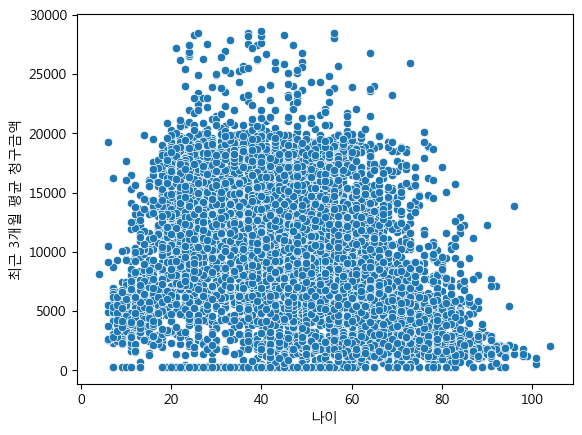

In [344]:
y.describe()
new_df.columns
sns.scatterplot(data=new_df,x = '나이',y = '최근 3개월 평균 청구금액')

### 딥러닝

In [348]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [351]:
new_df.head()

,나이,유효 서비스 개수,최근 3개월 평균 청구금액,최근 3개월 A 평균,최근 3개월 B 평균,최근 6개월 A 평균,최근 6개월 B 평균,해지 여부,고객 등급_C,고객 등급_D,고객 등급_E,고객 등급_F,고객 등급_G,고객 등급_H,성별_F,성별_M,일시정지 여부_N,일시정지 여부_Y,미납 여부_N,미납 여부_Y
0,28,0,2640.0000,792.00000,1584.0000,0.0,0.0,1,1,0,0,0,0,0,1,0,1,0,1,0
1,24,1,16840.0000,2526.00000,6983.0000,0.0,6981.0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,32,1,15544.7334,2331.71001,6750.4666,0.0,6508.8,0,0,0,0,1,0,0,1,0,1,0,1,0
3,18,1,4700.0000,0.00000,4502.0000,0.0,4507.7,0,0,1,0,0,0,0,0,1,1,0,1,0
4,78,1,1361.7999,1173.99990,0.0000,1123.5,0.0,0,1,0,0,0,0,0,1,0,1,0,1,0


In [352]:
X = new_df.drop(columns='해지 여부',axis=1)
y = new_df['해지 여부']

In [353]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.3,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size = 0.5,random_state=42)

In [355]:
X_train.shape

(5068, 19)

In [366]:
model = Sequential()
model.add(Dense(4,activation = 'relu',input_shape = (X_train.shape[-1], )))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))

In [367]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 80        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dropout_3 (Dropout)         (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [368]:
y_train.value_counts()

해지 여부
0    4524
1     544
Name: count, dtype: int64

In [369]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [370]:
history = model.fit(X_train,y_train,validation_data = (X_val,y_val),
                    batch_size = 4,epochs = 10)

Epoch 1/10
1267/1267 [==============================] - 2s 2ms/step - loss: 709.6508 - accuracy: 0.6620 - val_loss: 5.8081 - val_accuracy: 0.8840
Epoch 2/10
1267/1267 [==============================] - 2s 1ms/step - loss: 3.3031 - accuracy: 0.8895 - val_loss: 0.9262 - val_accuracy: 0.8996
Epoch 3/10
1267/1267 [==============================] - 2s 1ms/step - loss: 0.8543 - accuracy: 0.8950 - val_loss: 0.5758 - val_accuracy: 0.8987
Epoch 4/10
1267/1267 [==============================] - 2s 1ms/step - loss: 0.6052 - accuracy: 0.8934 - val_loss: 0.3979 - val_accuracy: 0.8913
Epoch 5/10
1267/1267 [==============================] - 2s 1ms/step - loss: 0.3888 - accuracy: 0.8931 - val_loss: 0.3623 - val_accuracy: 0.8913
Epoch 6/10
1267/1267 [==============================] - 2s 1ms/step - loss: 0.3582 - accuracy: 0.8938 - val_loss: 0.3472 - val_accuracy: 0.8923
Epoch 7/10
1267/1267 [==============================] - 2s 1ms/step - loss: 0.3448 - accuracy: 0.8942 - val_loss: 0.3406 - val_accurac

In [372]:
model.evaluate(X_test,y_test)

34/34 [==============================] - 0s 913us/step - loss: 0.3236 - accuracy: 0.8960


[0.32357555627822876, 0.896044135093689]

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)
# accuracy = accuracy_score(y_test,y_pred)
# recall = recall_score(y_test,y_pred)
# precision = precision_score(y_test,y_pred)
# f1 = f1_score(y_test,y_pred)

# print(accuracy)
# print(recall)
# print(precision)
# print(f1)

34/34 [==============================] - 0s 2ms/step
1.0


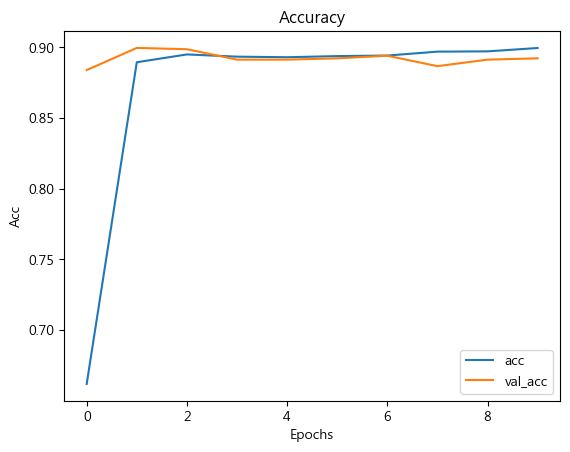

In [380]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()